In [240]:
# auto-reload modules when they have changed
%reload_ext autoreload
%autoreload 2

In [241]:
from modules.analyze.blob_detection import BlobDetector
from modules.load import image
from config import config as cfg

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [242]:
#path = cfg.image_FIDA_path
path = '/Users/kappel/Messungen/Setup04/JaKa/post_hack/23_07_06/control-77K-buffer+glycerol-vitrified/10uW/images/img_control_NaP_100mM_ph7dot5_Glycerol10_10uW_77K_circpol_20um_001.img'

In [243]:
# Load image
im = image.load_from_path(path)

# Initialize blob detector
bd = BlobDetector(input_image=im, blob_type='log')

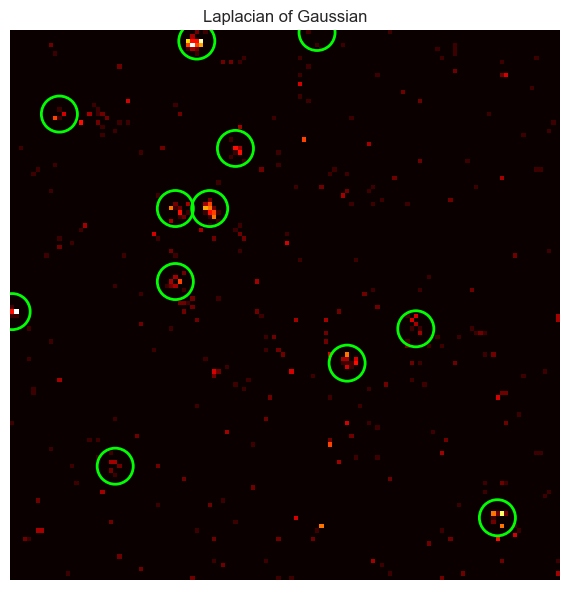

In [262]:
# Detect blobs
blobs = bd.detect_blobs(min_sigma=3, max_sigma=4, num_sigma=10, threshold=0.005);

# TODO: Plot blobs on image
bd.plot_blobs(blobs)

In [245]:
print(blobs)
blob_data = blobs

[[  2.  43.   3.]
 [ 65.   0.   3.]
 [ 41.  46.   3.]
 [ 77.  78.   3.]
 [ 27.  52.   3.]
 [ 41.  38.   3.]
 [ 19.  11.   3.]
 [ 58.  38.   3.]
 [  0.  71.   3.]
 [ 69.  94.   3.]
 [101.  24.   3.]
 [113. 113.   3.]]


In [246]:
blobs_log = blob_data
blobs = []

image_array = im.data['APD1'] + im.data['APD2']

for blob in blobs_log:
    # Get blob coordinates and radius
    y, x, r = blob

    # Extract blob pixels from original image
    blob_pixels = image_array[int(y - r):int(y + r), int(x - r):int(x + r)]

    # Do something with blob pixels
    # ...
    print(blob_pixels)
    print(blob_pixels.shape)

    if blob_pixels.shape[0] == blob_pixels.shape[1]: 
        blobs.append(blob_pixels)
    else: 
        print("Blob not square")

    #plt.imshow(blob_pixels, cmap='gray')
    #plt.show()



[]
(0, 6)
Blob not square
[]
(6, 0)
Blob not square
[[ 1  2  3  3  4  1]
 [ 6  5  3  8  5  3]
 [ 5  6  9 12  3  6]
 [ 0  5 14 13  8  4]
 [ 3  1  7 11 12  7]
 [ 2  4  2  7 13  3]]
(6, 6)
[[ 2  3  2  2  5  1]
 [ 2  2  5 13  4  5]
 [ 4  3  9  9  5 10]
 [ 6  6  7  7  7 11]
 [ 3  6  6 10  7  1]
 [ 1  3  4  1  4  2]]
(6, 6)
[[ 1  3  4  5  3  2]
 [ 2  1  7  6  2  5]
 [ 1  3  6  5  4  1]
 [ 3  4  3 11  9  3]
 [ 1  1  5  7 11  5]
 [ 5  0  7  4  5  6]]
(6, 6)
[[ 3  4  3  4  3  3]
 [ 2  6  3  4  3  2]
 [ 2  6  5  8  3  5]
 [ 6  3 13  7  8  2]
 [ 3  2  4  3 11  6]
 [ 4  3  3  5  7  8]]
(6, 6)
[[ 1  2  4  0  3  3]
 [ 0  4  4  5  3  1]
 [ 3  3  5  7  6  6]
 [ 2  6  5  5 10  5]
 [ 2  3 12  7  4  6]
 [ 2  2  4  5  6  4]]
(6, 6)
[[ 1  1  5  0  0  3]
 [ 2  4  2  5  5  8]
 [ 5  1  3  9  4  2]
 [ 2  5  9  5 12  4]
 [ 4  7  8  9  1  3]
 [ 1  5  1  5  6  7]]
(6, 6)
[]
(0, 6)
Blob not square
[[ 2  7  6 10  2  4]
 [ 1  3 10  4  2  2]
 [ 0  4  5  9  4  1]
 [ 3  2  7  6  7  5]
 [ 2  1  4  4  9  6]
 [ 2  4  3  4

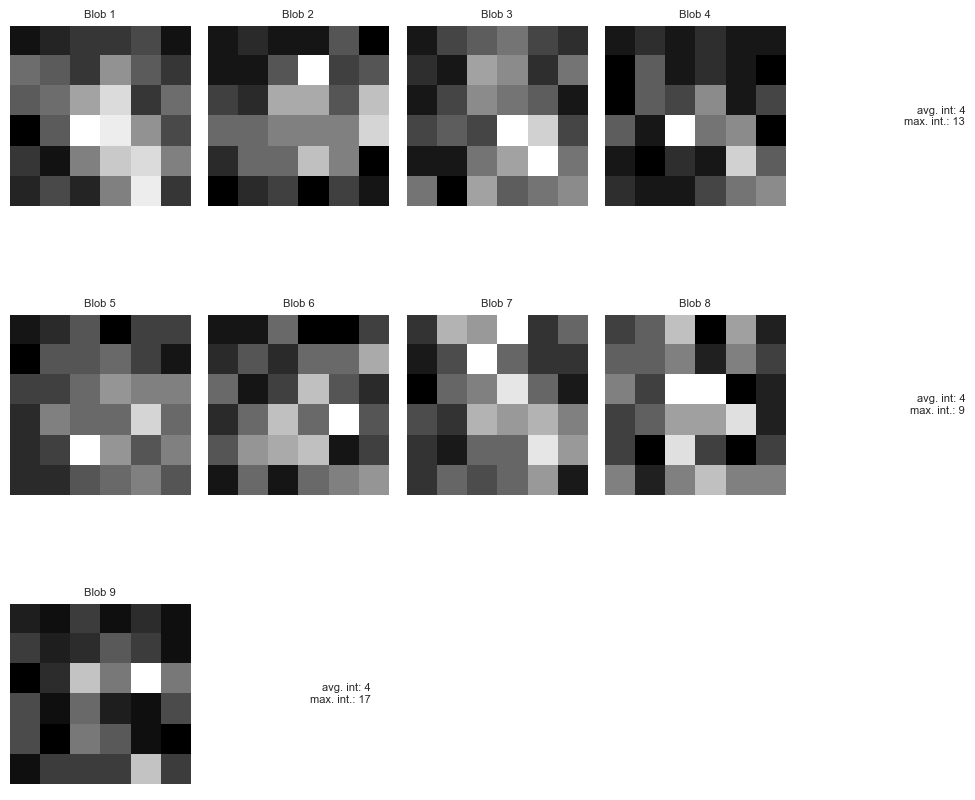

In [251]:
# Create grid of subplots
num_subplots = len(blobs)
num_cols = 4
num_rows = (num_subplots + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# Create list to store average intensities
avg_intensities = []
max_intensities = []

# Loop over blobs and plot in subplots
for i, blob in enumerate(blobs):
    # Calculate average intensity
    avg_intensity = np.mean(blob)

    # Calculate max intensity
    max_intensity = np.max(blob)

    avg_intensities.append(avg_intensity)
    max_intensities.append(max_intensity)

    # Plot blob in subplot
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.imshow(blob, cmap='gray')
    ax.set_title(f'Blob {i+1}', fontsize=8)
    plt.subplots_adjust(hspace = 0.5)
    plt.subplots_adjust(wspace = 0.1)
    ax.text(2, 0.5, f'avg. int: {int(avg_intensity)}\nmax. int.: {int(max_intensity)}', size=8, ha="right", va="center", bbox=dict(facecolor='white', alpha=0.5), transform=ax.transAxes)
    ax.set_axis_off()

# Hide unused subplots
for i in range(num_subplots, num_rows*num_cols):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.axis('off')

textstr = ''

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

#plt.tight_layout()
plt.axis
plt.show()

[6, 5, 4, 5, 4, 4, 4, 4, 4]
[14, 13, 11, 13, 12, 12, 10, 9, 17]


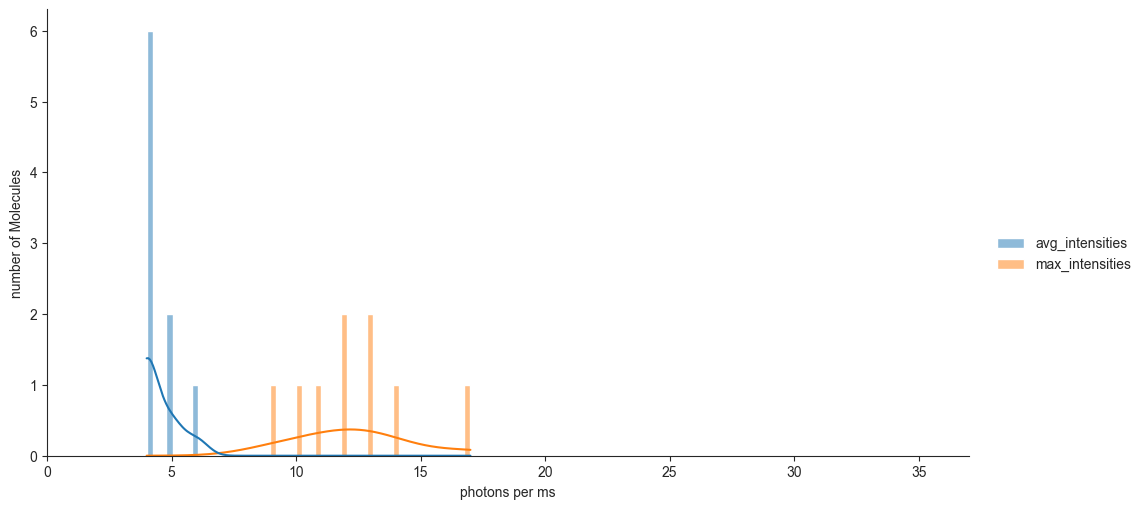

In [248]:
# Calculate histogram parameters
r_avg_intensities = [round(intensity) for intensity in avg_intensities]
r_max_intensities = [round(intensity) for intensity in max_intensities]

print(r_avg_intensities)
print(r_max_intensities)

# Create Pandas dataframe for avg_intensities and max_intensities
df = pd.DataFrame({'avg_intensities': r_avg_intensities, 'max_intensities': r_max_intensities})

if np.min(r_avg_intensities) >= np.min(r_max_intensities):
    max_bin = np.max(r_avg_intensities)
else:
    max_bin = np.max(r_max_intensities)



min_val = np.min(r_max_intensities)
max_val = np.max(r_max_intensities)

val_width = max_val - min_val
n_bins = 50
bin_width = val_width/n_bins

# Create barplot for histogram of average intensities
sns.set_style('white')
sns.displot(data=df, 
            bins=n_bins, 
            #binrange=(min_val, max_val), 
            kind='hist', 
            kde=True, 
            edgecolor='white', 
            height=5, 
            aspect=2)


# Set axis
plt.xlabel('photons per ms')
plt.ylabel('number of Molecules')
plt.tick_params(axis='both', which='both', bottom=True, left=True)
#plt.xticks(np.arange(min_val-bin_width/2, max_val+bin_width/2, bin_width))
plt.xlim(0, max_bin+20)
plt.show()